In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point, Polygon



In [ ]:
map = gpd.read_file('geo-data/limite250_l.shp')
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax)

In [ ]:
data = pd.read_csv('data/2023.csv')
data.head()


In [ ]:
data = data[data['Actividad_Realizada'] == 'Exploración']

data

C:\Users\seder\AppData\Local\Temp\ipykernel_14016\4105789646.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


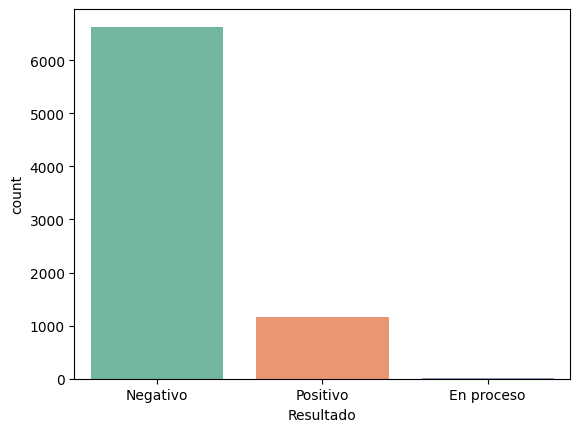

In [9]:
ax = sns.countplot(x="Resultado",data=data,palette = "Set2")


In [10]:
data_map = data[["Latitud", "Longitud","Resultado"]]
data_map
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(data_map['Longitud'], data_map['Latitud'])]
geo_df = gpd.GeoDataFrame(data_map, #specify our data
                          crs=crs, #specify our coordinate reference system
                          geometry=geometry) 


c:\Users\seder\code\locust\.venv\Lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
map.plot(ax=ax, alpha=0.4, color='grey')
geo_df[geo_df['Resultado'] == 'Negativo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='blue', 
                                       marker='o', 
                                       label='Negativo')
geo_df[geo_df['Resultado'] == 'Positivo'].plot(ax=ax, 
                                       markersize=5, 
                                       color='red', 
                                       marker='^', 
                                       label='Positivo')
plt.legend(prop={'size':20})
